<a href="https://colab.research.google.com/github/samedit66/collab_ai/blob/main/%D0%A6%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BA%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

dataset = pd.read_csv('diabetes.csv')

train_len = int(len(dataset) * 0.8)
train, test = dataset[:train_len], dataset[train_len:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


Визуальный анализ данных: количество беременностей пациенток с показанием, был ли у них при этом диабет

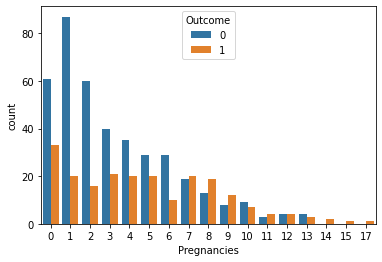

In [18]:
import seaborn as sns

sns.countplot(x='Pregnancies', hue='Outcome', data=train)

Удали колонку "Толщина кожи", т.к. она не является информативной  

In [19]:
train.drop(columns='SkinThickness', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Выполним нормализацию данных

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler.fit(train[columns_to_scale])

train[columns_to_scale] = scaler.transform(train[columns_to_scale])

train.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
X_train = train.drop(columns='Outcome', axis=1)
Y_train = train['Outcome']

X_train.head(3)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.657610,0.843160,0.177480,-0.688978,0.214539,0.433228,1.428430
1,-0.837844,-1.084789,-0.128767,-0.688978,-0.663890,-0.386757,-0.186774
2,1.255792,1.914242,-0.230849,-0.688978,-1.078007,0.566922,-0.101764


Создадим модель логистической регрессии и выполним её тренировку

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_train)

In [23]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

Проверим качество прогноза, построив матрицу ошибок

In [24]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_train, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix)

conf_matrix_labels = pd.DataFrame(conf_matrix, columns=['Прогноз диабет нет', 'Прогноз диабет есть'], index=['Факт диабет нет', 'Факт диабет есть'])

conf_matrix_labels

,Прогноз диабет нет,Прогноз диабет есть
Факт диабет нет,357,44
Факт диабет есть,89,124


In [25]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(Y_train, y_pred)

round(model_accuracy, 3)

0.783

Применим к тестовому датасету нормализацию и удалению лишних параметров

In [26]:
test.drop(columns='SkinThickness', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
X_test = test.drop(columns='Outcome', axis=1)
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [29]:
X_test.head(3)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
614,2.153065,0.537136,0.279562,0.546554,0.528263,0.225261,1.428430
615,-0.239662,-0.442139,0.177480,-0.688978,-0.764282,-0.814576,-0.526818
616,0.657610,-0.105513,1.402466,-0.688978,-0.400362,-0.963124,-0.271785


Выполним прогноз

In [30]:
y_pred_test = model.predict(X_test)

In [31]:
y_pred_test[:20]

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Сформируем файл с результатами (т.к. в исходном датасете не было уникального поля с ID пациентки, то в качестве ID будем использовать номер строчки таблицы, на которой находится данные о пациенте в исходном датасете)



In [32]:
ids = range(train_len + 1, len(dataset) + 1)

result = pd.DataFrame({'PatientID': ids, 'HasDiabets': y_pred_test})

result.head(3)

,PatientID,HasDiabets
0,615,1
1,616,0
2,617,0


In [35]:
result.to_csv('result.csv', index=False)
print('Файл успешно сохранился!')

Файл успешно сохранился!


Скачаем файл на жесткий диск

In [36]:
from google.colab import files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>